In [ ]:
#importing all the required libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
 #load the dataset
df=pd.read_excel('/content/Churn (1) (2).xlsx')
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


Exploaratory Analysis on Telecom churn Data

In [ ]:
# check for shape and size
print(df.shape)
print(df.size)

(5000, 21)
105000


In [ ]:
# check for columns
df.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [ ]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [ ]:
#checking descriptive statistical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.50,3750.25,5000.00
account.length,5000.0,100.258600,39.694560,1.0,73.00,100.00,127.00,243.00
voice.messages,5000.0,7.755200,13.546393,0.0,0.00,0.00,17.00,52.00
intl.mins,5000.0,10.261780,2.761396,0.0,8.50,10.30,12.00,20.00
intl.calls,5000.0,4.435200,2.456788,0.0,3.00,4.00,6.00,20.00
intl.charge,5000.0,2.771196,0.745514,0.0,2.30,2.78,3.24,5.40
day.mins,5000.0,180.288900,53.894699,0.0,143.70,180.10,216.20,351.50
day.calls,5000.0,100.029400,19.831197,0.0,87.00,100.00,113.00,165.00
eve.calls,5000.0,100.191000,19.826496,0.0,87.00,100.00,114.00,170.00
eve.charge,5000.0,17.054322,4.296843,0.0,14.14,17.09,19.90,30.91


There is a variation in the dataset , we need to scale the data

In [ ]:
#remvoing this columns as it's uneccessary
df=df.drop('Unnamed: 0',axis=1)
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
#check for null values
df.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


We cant find any null values in Dataset

In [ ]:
# to check number of churners and non-churners
df['churn'].value_counts()

,count
churn,
no,4293
yes,707


To group data and compute mean to check if churners make more service call than non-churners

In [ ]:
df.groupby('churn')['customer.calls'].mean()

,customer.calls
churn,
no,1.457722
yes,2.254597


Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.

In [ ]:
# to find out if one state has more churners
df.groupby('state')['churn'].value_counts()

state  churn
AK     no        67
       yes        5
AL     no       111
       yes       13
AR     no        76
               ... 
WI     yes        8
WV     no       136
       yes       22
WY     no       104
       yes       11
Name: count, Length: 102, dtype: int64

Alabana has more customer when compared to other state as a result more number of churners are there in Alabana i.e 13

In [ ]:
#group churn to check if churners make most international call comapred to non churners
df.groupby('churn')['intl.calls'].max()

,intl.calls
churn,
no,19
yes,20


There's no major difference between churners intl  call and non churners

Exploratory Data visualisation

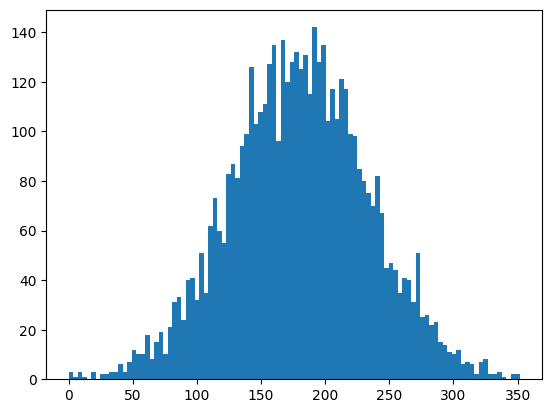

In [ ]:
#visulaise the distribution of 'total day minutes'
plt.hist(df['day.mins'],bins=100)
plt.show()

Visulaising customer service call between churners and non-churners


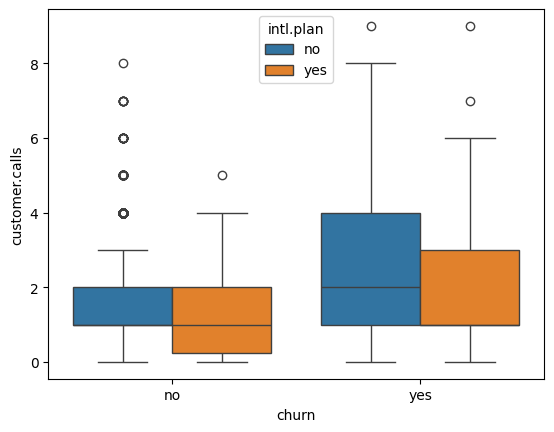

In [ ]:
#create a box plot
sns.boxplot(x=df['churn'],y=df['customer.calls'],data=df,hue='intl.plan')

#display the plot
plt.show()

It looks like customers who do churn end up leaving more customer service calls unless these customers also have an international plan,

 in which case they leave fewer customer service calls.

This indicates that before churning customers try to resolve their queries.

In [ ]:
#extracting all categorical columns for encoding
categorical_col=[] #to store categorical columns

numerical_col=[] # to store numerical columns

for col in df.columns:

  if df[col].dtype=='int64':
    numerical_col.append(col)

  if df[col].dtypes=='object':
    categorical_col.append(col)

  if df[col].dtype=='float64':
    numerical_col.append(col)

print('categorical columns',categorical_col)
print('Numerical columns',numerical_col)

categorical columns ['state', 'area.code', 'voice.plan', 'intl.plan', 'day.charge', 'eve.mins', 'churn']
Numerical columns ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


In [ ]:
for col in categorical_col:
    print(f"{col}: {df[col].apply(type).value_counts()}")


state: state
<class 'str'>    5000
Name: count, dtype: int64
area.code: area.code
<class 'str'>    5000
Name: count, dtype: int64
voice.plan: voice.plan
<class 'str'>    5000
Name: count, dtype: int64
intl.plan: intl.plan
<class 'str'>    5000
Name: count, dtype: int64
day.charge: day.charge
<class 'float'>    4949
<class 'int'>        44
<class 'str'>         7
Name: count, dtype: int64
eve.mins: eve.mins
<class 'float'>    4455
<class 'int'>       521
<class 'str'>        24
Name: count, dtype: int64
churn: churn
<class 'str'>    5000
Name: count, dtype: int64


**Data Preprocessing for Telco Churn Dataset**

In [ ]:
#encoding categorical values
from sklearn.preprocessing import LabelEncoder ,StandardScaler



#intialising the encoder
Le=LabelEncoder()

for col in categorical_col:
  df[col]=df[col].astype(str)
  df[col]=Le.fit_transform(df[col])

# Here , we scale the numerical values
# intialising the scaler
Sc=StandardScaler()

for col in numerical_col:
  df[col]=Sc.fit_transform(df[[col]])

df.head()


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,1,0.698941,1,1.273145,0,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1678,798,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.436676,0
1,35,1,0.169849,1,1.346973,0,1.245227,-0.584236,1.245982,-0.346802,1.158422,742,779,0.141693,-0.101089,1.068992,0.154374,1.069818,-0.436676,0
2,31,1,0.925695,0,-0.572549,0,0.701969,0.229917,0.695971,1.171125,0.704546,1516,118,0.494791,-1.572084,-0.748012,0.204483,-0.746737,-1.202236,0
3,35,0,-0.409634,0,-0.572549,1,-1.326194,1.044069,-1.329681,2.210292,-1.463971,1858,1796,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,0.328885,0
4,36,1,-0.636388,0,-0.572549,1,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,789,330,1.100103,-1.034426,-0.267041,1.056327,-0.267307,1.094445,0


FEATURE EXTRACTION

Training and Testing

In [ ]:
x=df.drop(['churn'],axis=1)
y=df['churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 19), (1000, 19), (4000,), (1000,))

Using Random Forest Classifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# intialising the classifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
model

RandomForestClassifier()

Making the prediction

In [ ]:
#predicting the output based on testing data
y_pred=rfc.predict(x_test)

Evaluating Model performance

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


print('classification Report \n ',classification_report(y_pred,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred,y_test))




classification Report 
                precision    recall  f1-score   support

           0       0.99      0.96      0.98       884
           1       0.76      0.92      0.83       116

    accuracy                           0.96      1000
   macro avg       0.87      0.94      0.90      1000
weighted avg       0.96      0.96      0.96      1000

confusion_matrix 
 [[850  34]
 [  9 107]]


Accuracy score = 0.96

Precision= 1

Recall = 0.96

f1-score = 0.98



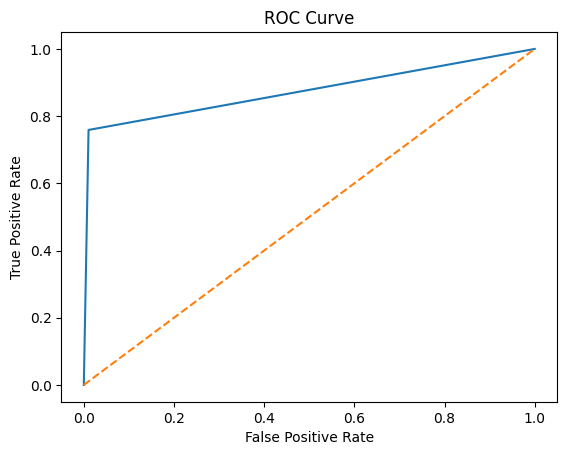

In [ ]:
from sklearn.metrics import roc_curve

# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The closer the curve is to the top-left corner, the better the model.

Hence we can say that This is best fit model.

In [ ]:
roc_curve(y_test, y_pred)

(array([0.       , 0.0104773, 1.       ]),
 array([0.        , 0.75886525, 1.        ]),
 array([inf,  1.,  0.]))

**False Positive Rate (FPR)** →
Measures the proportion of negative cases incorrectly classified as positive.

Starts at 0.0, meaning no false positives at the highest threshold.

Ends at 1.0, meaning all negatives are classified as positives at the lowest threshold.

0.00349243 suggests that at a certain threshold, the model has very few false positives.





True Positive Rate (TPR) →

Measures the proportion of actual positives correctly identified.

Starts at 0.0, meaning no true positives at the highest threshold.

Ends at 1.0, meaning all positives are correctly classified at the lowest threshold.

0.71631206 means that at a certain threshold, the model captures ~71.63% of actual positives.

**Thresholds → **

Decision boundary for classifying a sample as positive.

inf means at the highest possible threshold, no predictions are classified as positive.

1.0 and 0.0 represent two other threshold points where FPR & TPR change.

The model outputs probabilities, and lowering the threshold increases the number of positives classified.

**🔹 Interpretation**

ROC curve looks reasonable because:
The TPR increases as the threshold decreases.
The FPR is relatively low (0.00349), which is a good sign—few false alarms.
TPR is at ~71.63%, meaning the model detects around 71% of actual positives.

Deployment

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

# Download the file
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('model.pkl')  # Ensure 'model.pkl' is in the same directory

# Streamlit App UI
st.title("Customer Churn Prediction")
st.write("Enter customer details to predict churn.")

# Input fields
state = st.number_input("State Code", min_value=0, max_value=50, step=1)
area_code = st.selectbox("Area Code", [0, 1])  # Assuming categorical encoding
account_length = st.number_input("Account Length (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
voice_plan = st.selectbox("Voice Plan", [0, 1])
voice_messages = st.number_input("Voice Messages (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
intl_plan = st.selectbox("International Plan", [0, 1])
intl_mins = st.number_input("International Minutes (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
intl_calls = st.number_input("International Calls (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
intl_charge = st.number_input("International Charge (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
day_mins = st.number_input("Day Minutes (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
day_calls = st.number_input("Day Calls (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
day_charge = st.number_input("Day Charge (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
eve_mins = st.number_input("Evening Minutes (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
eve_calls = st.number_input("Evening Calls (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
eve_charge = st.number_input("Evening Charge (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
night_mins = st.number_input("Night Minutes (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
night_calls = st.number_input("Night Calls (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
night_charge = st.number_input("Night Charge (normalized)", min_value=-2.0, max_value=2.0, step=0.01)
customer_calls = st.number_input("Customer Service Calls (normalized)", min_value=-2.0, max_value=2.0, step=0.01)

# Predict button
if st.button("Predict Churn"):
    input_data = np.array([[state, area_code, account_length, voice_plan, voice_messages, intl_plan, intl_mins, intl_calls, intl_charge, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, customer_calls]])
    prediction = model.predict(input_data)

    # Show result
    if prediction[0] == 1:
        st.error("This customer is likely to churn. ❌")
    else:
        st.success("This customer is not likely to churn. ✅")
""")


In [ ]:
from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>